<a href="https://colab.research.google.com/github/enamablanky/Heart-Disease-Prediction-/blob/main/Heart_Disease_prediction_for_the_DSN_AI_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Example model
from sklearn.metrics import accuracy_score


IMPORT DATASET

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/train_dataset .csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/test_dataset.csv')

EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
train_dataset.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [ ]:
test_dataset.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [ ]:
train_dataset.isnull().sum(), test_dataset.isnull().sum()

(Id          0
 Age         0
 Sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
 id          0
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 dtype: int64)

In [ ]:
train_dataset.info(), test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  

(None, None)

In [ ]:
train_dataset.describe(), test_dataset.describe()

(                 Id          Age          Sex           cp     trestbps  \
 count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
 mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
 std     2886.026080    14.185970     0.500034     1.115594    31.099538   
 min    10001.000000    29.000000     0.000000     0.000000    94.000000   
 25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
 50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
 75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
 max    19998.000000    77.000000     1.000000     3.000000   200.000000   
 
               chol          fbs      restecg      thalach        exang  \
 count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
 mean    342.805970     0.493085     1.013008   136.506093     0.503218   
 std     127.291998     0.499986     0.815806    38.141966     0.500024   
 min     126.0

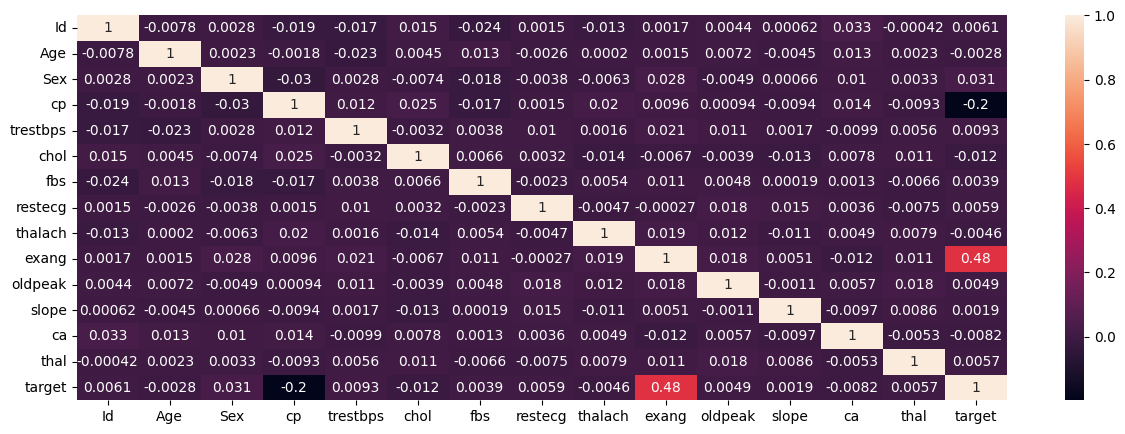

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(train_dataset.corr(), annot=True)
plt.show()

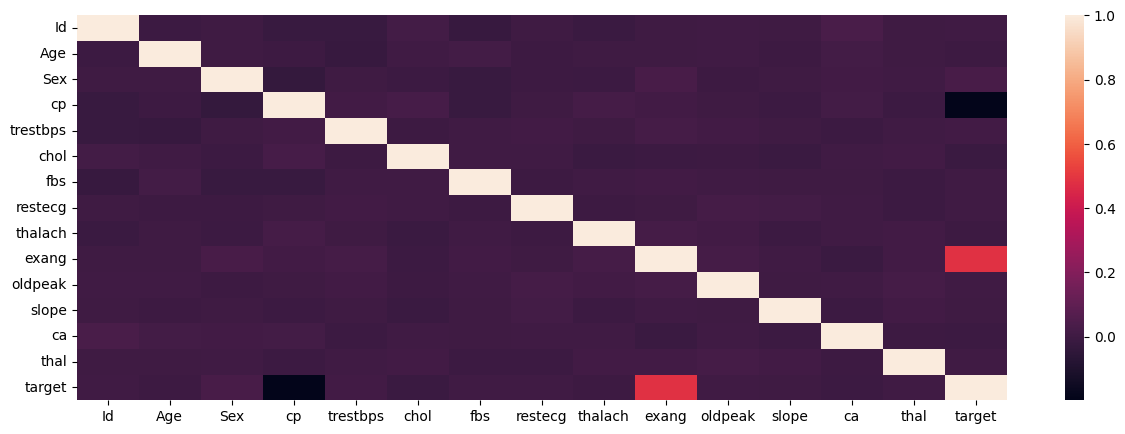

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(train_dataset.corr())
plt.show()

SPLIT DATA INTO FEATURES (X) AND TARGET (y)

In [ ]:
X = train_dataset.drop(columns=['Id', 'target'])
y = train_dataset['target']

SPLIT INTO TRAINING AND VALIDATION SETS

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create and train model

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)  # Train the model with your training data

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# Predict on validation set

y_pred = model.predict(X_val)

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)

PREDICT ON TRAIN DATA

In [ ]:
X_test = train_dataset.drop(columns=['Id'])

MAKE PREDICTION ON TEST DATA

In [ ]:
test_predictions = model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- target


In [ ]:
print(len(train_dataset['Id']))
print(len(train_predictions))

In [ ]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({'Id': test_dataset['Id'], 'target': test_predictions})
# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)